# Module 6: WeatherPy with Python APIs
Using APIs to Visualize Weather Data
 

# Generate Random Coordinates of World Cities

## 6.1.2 Overview of the Project


#### Basic Project Plan

- <b>Task:</b> Collect and analyze weather data across cities worldwide.
- <b>Purpose:</b> PlanMyTrip will use the data to recommend ideal hotels based on clients' weather preferences.
- <b>Method:</b> Create a Pandas DataFrame with 500 or more of the world's unique cities and their weather data in real time. This process will entail collecting, analyzing, and visualizing the data.


#### 1. Collect the Data
- Use the NumPy module to generate more than 1,500 random latitudes and longitudes.
- Use the citipy module to list the nearest city to the latitudes and longitudes.
- Use the OpenWeatherMap API to request the current weather data from each unique city in your list.
- Parse the JSON data from the API request.
- Collect the following data from the JSON file and add it to a DataFrame:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
        

#### 2. Exploratory Analysis with Visualization
- Create scatter plots of the weather data for the following comparisons:
    - Latitude versus temperature
    - Latitude versus humidity
    - Latitude versus cloudiness
    - Latitude versus wind speed
- Determine the correlations for the following weather data:     
    - Latitude and temperature
    - Latitude and humidity
    - Latitude and cloudiness
    - Latitude and wind speed
- Create a series of heatmaps using the Google Maps and Places API that showcases the following:
    - Latitude and temperature
    - Latitude and humidity
    - Latitude and cloudiness
    - Latitude and wind speed

#### 3. Visualize Travel Data
- Create a heatmap with pop-up markers that can display information on specific cities based on a customer's travel preferences. Complete these steps:
    1. Filter the Pandas DataFrame based on user inputs for a minimum and maximum temperature.
    2. Create a heatmap for the new DataFrame.
    3. Find a hotel from the cities' coordinates using Google's Maps and Places API, and Search Nearby feature.
    4. Store the name of the first hotel in the DataFrame.
    5. Add pop-up markers to the heatmap that display information about the city, current maximum temperature, and a hotel in the city.

  
## 6.1.3 Review the Geographic Coordinate System
We use the geographic coordinate system (GCS) to reference any point on Earth by its latitude and longitude coordinates.

Latitudes are imaginary lines on Earth that run parallel east to west and are measured in angular units called degrees, minutes, and seconds, with 60 minutes in a degree and 60 seconds in a minute. Sometimes a latitude is referred to as a parallel. Consider, for example, the embattled 38th parallel (38° north) in East Asia that roughly demarcates North Korea and South Korea.

The equator is an imaginary line around the middle of the earth that is equidistant from the North and South Poles and has a latitude of 0°. The equator splits Earth into Northern and Southern Hemispheres.
- All latitude lines above the equator are measured northward and considered positive, after 0° (the equator) and up to 90°, or 90° north (the North Pole). 
- All latitude lines below the equator are measured southward and considered negative, before 0° (the equator) and down to –90°, or 90° south (the South Pole).

Longitudes are imaginary lines on Earth that run from the North to the South Poles and are called meridians. The prime meridian represents zero meridian, the origin for longitude coordinates, and splits Earth into the Eastern and Western Hemispheres.
- All meridians east of the prime meridian are considered positive, after 0° and up to 180°. 
- All meridians west of the prime meridian are considered negative, before 0° and down to –180°.

All together, the lines of latitude (parallels) and longitude (meridians) make up a geographic grid, as if the Earth were wrapped in graph paper with intersecting horizontal and vertical lines mapping to specific locations.

GCS makes it possible to pinpoint any place on Earth by providing its precise address, which is the intersection of its latitude and longitude lines.


## 6.1.4 Generate Random Latitudes and Longitudes

Earth's surface is covered by 70% water while the rest is covered by land. So, we can assume 70% of the latitude and longitude coordinates we generate are positioned over a body of water, whether an ocean, major lake (e.g., Lake Superior), or major river (e.g., Amazon). Geographic coordinates over a body of water may not be close to a city, especially if in the middle of an ocean.

Seven continental landmasses comprise 30% of Earth's surface. Some land is uninhabitable or sparsely populated due to extreme terrain and climes (e.g., Sahara, Siberia, the Himalayas, and areas of the western United States).

First consider the bodies of water. Start with at least 1,500 latitudes and longitudes, because 500 divided by 0.3 (30% land mass) equals 1,666 latitudes and longitudes.

We'll generate random latitudes and longitudes to ensure coordinates are fairly distributed around the world. An algorithm will pick random numbers between the low and high values for latitudes and longitudes. Also, the latitudes and longitudes must be floating-point decimal numbers, as each angular unit of degrees, minutes, and seconds can be represented by a decimal number. For example, Kailua-Kona, Hawaii has the angular coordinates 19° 38' 23.9784'' north and 155° 59' 48.9588'' west and can be written as a decimal number as follows: 19.639994, -155.996933.

To generate random numbers, we can use the <code>Python</code> random module. This module is part of the Python and Anaconda installation, so we don't need to install it. Let's test some <code>random</code> module functions to find one that can help us.

### The random Module

Import the <code>random</code> module.

    #Import the random module.
    import random
    
Type <code>random.</code>, and press the Tab key for a list of available <code>random</code> module functions.

    random. 
    
#### The randint() Function
<code>randint</code> is short for "random integer."
- This function will only return one integer, not a floating-point decimal, between the given intervals. 

      random.randint(–90, 90)

#### The random() Function
- Using the random() function, we can get a single floating-point decimal number between 0 and 1.0.

If we combine <code>random.randint(-90, 89)</code> and <code>random.random()</code> to generate a floating-point decimal between –90 and 90, we can generate a random latitude. We changed the lower range of the <code>randint()</code> because we want whole numbers up to 89, so when we add the floating-point decimal number, we'll generate latitudes between –89.99999 and 89.99999. Using these two functions, we can write an algorithm that will generate latitudes between –90 and 89.

    random_number = random.randint(-90, 89) + random.random()
    random_number
    
    -32.8492252525804476
    
Here is a small sample of what it might take to generate ten random floating-point decimal latitudes between –90 and 89.

    x = 1
    latitudes = []
    while x < 11:
        random_lat = random.randint(-90, 89) + random.random()
        latitudes.append(random_lat)
        x += 1
        
In the code block above, we:
1. Assign the variable x to 1.
2. Initialize an empty list, latitudes.
3. We create a while loop where we generate a random latitude and add it to the list.
4. After the random latitude is added to the list we add one to the variable "x".
5. The while loop condition is checked again and will continue to run as long as x is less than 11.

Next, we would have to use a similar method to get random longitudes between –180 and 180, which we can then pair with the latitudes. 

#### The randrange() Function
The randrange() function behaves differently than the previous two functions. Inside the parentheses, we need to add two numbers, a lower and upper limit, separated by a comma.
- For the randrange() function, there is an option to add a step parameter and set it equal to an integer, which will generate increments of a given integer value, from the lower to the upper limit.
    - step is the difference between each number in the sequence.

          add random.randrange(-90, 90, step=3)

<b>NOTE:</b>
If you don't add the step parameter, the output will be a number with an increment of 1, which is the default integer value.
     
#### The uniform() Function
The uniform() function will allow us to generate a floating-point decimal number between two given numbers inside the parentheses.
      
    random.uniform(-90, 90)
    
![Random](https://github.com/yessiez/World_Weather_Analysis/blob/master/random_numbers_chart.png?raw=true)

### The NumPy and random Modules
The NumPy module is a numerical mathematics library that can be used to make arrays or matrices of numbers.

<b>NOTE:</b> The NumPy module has a built-in random module, and supplements the built-in Python random module. There is no need to import the random module if we import the NumPy module, as it's redundant.

When we use the NumPy module with the <code>random.uniform()</code> function, the parenthetical parameters contain a lower boundary (low value) and an upper boundary (high value) that are floating-point decimal numbers.

    np.random.uniform(-90.000, 90.000)
    
        OR
    
    np.random.uniform(low=-90, high=90)
    
To generate more than one floating-point decimal number, we can add the <code>size</code> parameter when we use the NumPy module and set that equal to any whole number.

    np.random.uniform(-90.000, 90.000, size=50)
    
    - The output is an array of 50 floating-point decimal numbers between –90.000 and 90.000.
    
To test how long a piece of code or function takes to run, we can import the "timeit" module and use the <code>%timeit</code> magic command when we run our code or call the function.
- The amount of time it takes to run this code depends on the processing speed and the RAM of your computer.

      # Import timeit.
      import timeit
    
      %timeit np.random.uniform(-90.000, 90.000, size=1500)
    
    - The output is the amount of time it took to run the code for 7 runs and 1,000 loops per run.
    
          def latitudes(size):
              latitudes = []
              x = 0
              while x < (size):
                  random_lat = random.randint(-90, 90) + random.random()
                  latitudes.append(random_lat)
                  x += 1
               return latitudes
          # Call the function with 1500.
          %timeit latitudes(1500)
              
          - The output is 1.45 milliseconds.
          
Using the <code>np.random.uniform(-90.000, 90.000, size=1500)</code> is 100 times faster than using the function, and our code is one line, whereas the function uses eight lines!

### Create Latitude and Longitude Combinations
   

In [38]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.

In [39]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

When we run this cell, the output is a zip object in memory. 

The zip object packs each pair of <code>lats</code> and <code>lngs</code> having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

(Practice zipping a small number of latitudes and longitudes and then unpacking the zipped tuple to see how the packing and unpacking work in Jupyter Notebook file called API_practice.ipynb)

    # Create a practice set of random latitude and longitude combinations.
    x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
    y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
    coordinates = zip(x, y)
    
    # Use the tuple() function to display the latitude and longitude combinations.
    for coordinate in coordinates:
        print(coordinate[0], coordinate[1])
   
- The output is ordered pairs of our x and y coordinates.

Next, let's unpack our <code>lat_lngs</code> zip object into a list. This way, we only need to create a set of random latitudes and longitudes once.



In [40]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

 <b>NOTE:</b> You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

Now that we have our ordered pairs of latitudes and longitudes in a list, we can iterate through the list of tuples and find the nearest city to those coordinates.



## 6.1.5 Generate Random World Cities
With our list of random latitudes and longitudes, we'll use the coordinates in our <code>lat_lngs</code> tuple to find the nearest city using Python's <code>citipy</code> module.

To install the <code>citipy</code> module on macOS, complete the following steps:

1. Click the clipboard icon to copy <code>pip install citipy</code>.

2. Launch the command line and make sure you are in your PythonData environment. You should see the following in your terminal:

        (PythonData) your_computer_name:~ your_home_directory
        
3. Paste <code>pip install citipy</code> and press Enter.
- The citipy module will probably take a few minutes to download into your PythonData environment.(Import the citipy script and practice using it in our API_practice file).

      #Import the citipy module.
      from citipy import citipy

Next, use the five pairs of latitudes and longitudes we used from our zip practice to get a city and country code from the <code>citipy</code> module.
    
    # Create a practice set of random latitude and longitude combinations.
    x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
    y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
    coordinates = zip(x, y)
    
In a new cell, create a for loop that will do the following:
1. Iterate through the coordinates' zipped tuple.
2. Use <code>citipy.nearest_city()</code> and inside the parentheses of <code>nearest_city()</code>, add the latitude and longitude in this format:

       coordinate[0], coordinate[1].
    
3. To print the <code>city name</code>, chain the <code>city name</code> to the <code>nearest_city()</code> function.
4. To print the </code>country name</code>, chain the <code>country_code</code> to the </code>nearest_city()</code> function.

       # Use the tuple() function to display the latitude and longitude combinations.
        for coordinate in coordinates:
            print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
              citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

        - The output will show five cities with their associated country codes.

Now that we are familiar with using the <code>citipy module</code>, we can iterate through our zipped <code>lat_lngs</code> tuple and find the nearest city. When we find a city, we'll need to add it to a list so that we can use the cities to get the weather data.

In [41]:
# Import the citipy module.
from citipy import citipy

In [42]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

Let's break it down:

1. We create a cities list to store city names.
2. We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.
3. We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

<b>NOTE:</b> The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

#### FINDING
When you run the code block, you should get slightly more than 500 unique cities. If you get fewer than 500, increase your size limit on the np.random.uniform() function.

# Retrieve, Collece, and Clean Weather Data

## 6.1.1 Create and Clone a new GitHub Repository

## 6.2.1 Understanding APIs

When a client uses our company's website to search for hotels, our search engine will gather information from a variety of websites based on the client's preferences through APIs. An API call is very similar to navigating to a website. An API points to a URL and collects some data from the webpage or server.

When clients request information from our server through our website, they are making an API call. Once our database has the client's search criteria, our servers search the web for hotels on behalf of the client. Now the roles are reversed: our company is the client requesting information, and all the websites where we derive information are the servers.

Using an API has its limitations because not all information from a server is accessible. Most APIs have tiered services, from free to paid. Free services allow access to limited information, and paid subscriptions provide more access based on the payment plan. Our company has a paid subscription for APIs, but we can only get certain information from websites on hotels such as location, accessibility, rooms, prices, services, and amenities, as well as regional weather data.

Now that you have a general concept of how APIs work, let's register for an OpenWeatherMap API key, a token granting access, and use it to retrieve weather data.

## 6.2.2 Get Started with OpenWeatherMap API
### Register for an API Key
Follow these steps to register for an OpenweatherMap API key:
1. Navigate to the OpenWeatherMap website (Links to an external site.).
2. Click "sign up."
3. Complete the form Create New Account.
4. Once you have a new account, sign in and click on "API keys."
5. The site will likely generate an API key automatically. If not, under "Create key," type a name in the available cell and click "Generate" to create an API key.
6. Save your API key to a Python file, which we'll add as a dependency to your WeatherPy.ipynb file.
    - Navigate to your World_Weather_Analysis folder and launch Jupyter Notebook.
    - Click the New button and select Text File.
    - Rename the text file config.py.
    - On the first line, type weather_api_key="" and add your API key between the double quotation marks.
    - Save and close the config.py file.

<b>NOTE:</b> You can also create the config.py file using VS Code.

#### IMPORTANT
Don't share your API key with anyone, and do not add the config.py file to your GitHub repository–someone might copy and use it, and you could incur charges on your credit card.

7. Click on "Services" for details on your free subscription and its limitations.
8. Click on "View" to see more options on your plan, and then click on "Current weather API" to see how to get the current weather from a city.
    - We'll refer to this documentation when we make an API call to the server.


### The JavaScript Object Notation Format for API Data
The API has reached the website or server, its endpoint, and now we can retrieve data from the website. When we retrieve data from a website, we have to make a "request," which returns data in a text format, not in a tab- or comma-separated file.

One format we can use to parse data is JavaScript Object Notation (JSON). The JSON format is also referred to as an "object" or "JSON object." The data inside a JSON object opens and closes with curly braces, much like a Python dictionary. Inside the JSON object is a collection of dictionaries and arrays.

Below is an example of what weather data looks like in the JSON format when we request it from the OpenWeatherMap website. There are curly braces that wrap the data, and inside the curly braces are dictionaries and arrays.

![jsonformat](https://courses.bootcampspot.com/courses/691/files/683266/preview)

### The Python Requests Library
To request JSON data over the internet, we use the Requests Library in Python. 

Confirm you have the latest version of the Requests Library using the command line, or in the Jupyter Notebook environment.
1. Launch the command line and activate your <code>PythonData</code> environment.
2. After the prompt, type <code>python</code> to launch Python.
3. After the Python prompt, >>>, type <code>import requests</code> and press Enter.
4. On the next line, type <code>requests.__version__ </code>and press Enter.
5. The output should be <code>version 2.22.0</code> or later.

Alternatively, you can check the version of request in Jupyter Notebook.




## 6.2.3 Make an API Call
(See <code>API_practice</code> file)
1. Import the Requests Library and your API key from the <code>config.py</code> file. 

<b>NOTE:</b> 
Your <code>config.py</code> file should be in the same folder as your <code>API_practice.ipynb</code> file or any Jupyter Notebook file that is accessing the <code>config.py</code> file.
      
    # Import the requests library.
    import requests

    # Import the API key.
    from config import weather_api_key
  
<b>NOTE:</b> 
If you get a <code>ModuleNotFoundError</code> message, then either your <code>config.py</code> file is not in the same folder as the Jupyter Notebook file, or the name of your <code>config.py</code> file is not the same in the import statement.

If you get a <code>ImportError</code> message, then the variable for your API key in the code statement is not the same as the variable in your <code>config.py</code> file.

### Make an API Call
Before we make an API call for the OpenWeatherMap, we need to use the URL provided on the OpenWeatherMap website.
1. Navigate to the OpenWeatherMap API documentation for current weather.
2. This page provides instructions on how to make the API call by city name. The structure of our URL should look like the following:
<code>api.openweathermap.org/data/2.5/weather?q=city&appid=b6907d289e10d714a6e88b30761fae22</code>
3. Add your API key and the city from the cities array for each call.

        # Starting URL for Weather Map API Call.
        url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
        print(url)
        
    <b>NOTE:</b>
    Once you print out your URL, be sure to delete your printed URL from your notebook. This prevents your private API key from being stored in plain text.
    
You may have noticed that we added another feature to the URL: <code>units=Imperial</code>. There are three unit options: standard, metric, and imperial. Navigating to the units section of the current weather data page will show you the options for the unit format: standard metric, and imperial.

When we run the cell, the output will be a URL. Click the URL, and a new window will open in your default web browser. The URL will return a 400 message because we haven't added a city to our URL (See <code>API_practice.iynb</code>). 

![geocode](https://courses.bootcampspot.com/courses/691/files/683411/preview)

Now let's add a city to the URL to get the current weather data.
    
    # Create an endpoint URL for a city.
    city_url = url + "&q=" + "Boston"
    print(city_url)

In the code, we are creating a string to get the weather data for Boston by using the <code>city_url</code>. To create the <code>city_url</code> we add the parameter, <code>&q=</code> and <code>"Boston"</code> to the url.

The output of this cell will also be a URL. Click the URL and a new window will open in your default web browser that shows the current weather data for Boston.
![boston](https://courses.bootcampspot.com/courses/691/files/684670/preview)

To make the JSON format readable, add the Chrome JSONView extension (Links to an external site.) to your Chrome web browser. The Boston weather data will appear as follows.
![boston_readable](https://courses.bootcampspot.com/courses/691/files/684420/preview)

## 6.2.4 Make a Request for Data to an API
Retrieve a Response Using the <code>get()</code> Method
Use the <code>get()</code> method, a feature of the Requests Library, to request data from an API. The <code>get()</code> method is one of many HTTP methods that allow us to access, add, delete, get the headers, and perform other actions on the request.

Below is a list of HTTP methods and their uses. For more information, see the Requests Library.

![api methods](https://github.com/yessiez/World_Weather_Analysis/blob/master/API_methods.png?raw=true)

Inside the parentheses of the <code>get()</code> method, add the URL–in our case, the <code>city_url</code>. Let's make a request to get our weather data for Boston (See <code>API_practice.ipynb</code> file).

    # Make a 'Get' request for the city weather.
    city_weather = requests.get(city_url)
    city_weather
    
    - When you run this code you will get a code response number.
    
The code output will be <Response [200]>, indicating a valid response. We won't see this code when a website appears in a browser. However, when a website does not appear, we'll see a 404 code, indicating a client error.
   - You can directly call the response code with the <code>get()</code> method using the <code>status_code</code>. If we chain the <code>status_code</code> to the <code>city_weather</code> variable, we get 200 as the output.
   - If we tried to get weather data from an unrecognized city, or if the weather data for a city wasn't available, we would get a 404 response.

Let's see what would happen if we misspelled a city name–"<code>Bston</code>" instead of "Boston."

    # Create an endpoint URL for a city.
    city_url = url + "&q=" + "Bston"
    city_weather = requests.get(city_url)
    city_weather
    
    - When we run this cell the output is a <Response [404]>.

### Get Data from a Response
Now, we'll see what happens when we get a valid response.
    
    # Create an endpoint URL for a city.
    city_url = url + "&q=" + "Boston"
    city_weather = requests.get(city_url)
    city_weather
    
    - When we run this cell the output is "<Response [200]>."
    
When we receive a valid response from the server, we have to decide on the data format. The options are text, JSON, XML, or HTML format. We can apply the format attributes to get the data into a useful format to parse.

One format that provides a preview of the JSON data is the <code>text</code> attribute.

    # Get the text of the 'Get' request.
    city_weather.text
    
    - Running this cell, we'll get the following output:
![get request](https://courses.bootcampspot.com/courses/691/files/684436/preview)

The text in the output is a dictionary of dictionaries and arrays, or a JSON file. We can work with this data, but it might be more challenging if we needed to retrieve temperature (<code>temp</code>) and humidity (<code>humidity</code>) from this output because the data is in a sentence format.

    # Get the JSON text of the 'Get' request.
    city_weather.json()
    
    - When we run the cell the output will be the weather data for Boston in JSON format.
    
With the JSON method, it is a lot easier to see the overall structure of the data, which will make it easier to retrieve data such as temperature and humidity.



### Handle Request Errors

When we submit a <code>get</code> request for the <code>city_weather</code>, we want to make sure that we get a valid response, i.e., 200, before we retrieve any data. 

To check if we get a valid response, we can write a conditional expression that will evaluate whether the status code is equal to 200. 
- If it is, then we can print out a statement that says the weather data was found. 
- If there is a response other than 200, we can print out a statement that says the weather was not found, as in the following example:
    
        # Create an endpoint URL for a city.
        city_url = url + "&q=" + "Boston"
        city_weather = requests.get(city_url)
        if city_weather.status_code == 200:
            print(f"City Weather found.")
        else:
            print(f"City weather not found.")
                
When the conditional expression is evaluated, it will print <code>City weather found</code> if true, or <code>City weather not found</code> if false. 
- When we run the cell code above, the output is <code>City weather found</code>.

<b>NOTE:</b> If the <code>status_code</code> is something other than 200, JSON data will always be returned in the request. We can determine if the response was successful by checking the <code>status_code</code>, clicking the URL, or retrieving specific information from the JSON data.

    # Create an endpoint URL for a city.
    city_url = url + "&q=" + "Bston"
    city_weather = requests.get(city_url)
    if city_weather.json():
        print(f"City Weather found.")
    else:
        print(f"City weather not found.")
        
    - The output for this code is City weather not found.
    
However, if we type <code>print(city_url)</code> in a new cell and run the cell, the output will be a URL. If we click the URL, the web browser returns a 404 response and there is no data to retrieve.



## 6.2.5 Parse a Response from an API

For each city in our <code>lats_lngs</code> list, we need to retrieve the following data and add it to a <code>DataFrame</code>:

- City, country, and date
- Latitude and longitude
- Maximum temperature
- Humidity
- Cloudiness
- Wind speed

Before we collect weather data from more than 500 cities, we'll walk through how to get the weather data from Boston. First, correct the spelling for the city of <code>Boston</code> to get a valid URL. 
    
    # Create an endpoint URL for a city.
    city_url = url + "&q=" + "Boston"
    city_weather = requests.get(city_url)
    city_weather.json()
    
    - The output will be the JSON-formatted data from the city of Boston.
![boston json](https://courses.bootcampspot.com/courses/691/files/683287/preview)

First, let's get something simple, like the country code from the JSON formatted data, which is in a nested dictionary where the first dictionary starts with sys.

![sys](https://courses.bootcampspot.com/courses/691/files/684497/preview)

1. In a new cell, let's assign a variable to the <code>city_weather.json()</code> data to the variable "boston_data" and run the cell.

        # Get the JSON data.
        boston_data = city_weather.json()

2. Next, using the <code>sys</code> key to get the corresponding value, we type <code>boston_data['sys']</code> in a new cell and run the cell. The output is another dictionary as shown in the following image.

![bostonsys](https://courses.bootcampspot.com/courses/691/files/683360/preview)

3. If we add the country key in brackets after the sys key, and run the cell again, ‘US’ will be returned in the output.

<b>NOTE: </b> When we used boston_data["sys"], there was a key for sunrise and a key for sunset in the output. The value for these keys is the time of day in seconds in a database timestamp format.

If we want to retrieve the date in the weather data, we would add the dt key to the boston_data variable like this: boston_data["dt"].

Using similar syntax to get the time of day, we can get the latitude, longitude, maximum temperature, humidity, percent cloudiness, and wind speed. 

    lat = boston_data["coord"]["lat"]
    lng = boston_data["coord"]["lon"]
    max_temp = boston_data["main"]["temp_max"]
    humidity = boston_data["main"]["humidity"]
    clouds = boston_data["clouds"]["all"]
    wind = boston_data["wind"]["speed"]
    print(lat, lng, max_temp, humidity, clouds, wind)
    
    - The output will be all of the weather parameters, with the units for maximum temperature in degrees Fahrenheit, the humidity and clouds as a percentage, and the wind in miles per hour.
    
### Convert the Date Timestamp
The date format will appear in seconds, as we saw when we ran this code.

This format is called Coordinated Universal Time (UTC) or Greenwich Mean Time (GMT). If we want to convert the timestamp to the International Organization for Standardization (ISO) format, or YYYY-MM-DD-HH-MM-SS, we need to use the Python datetime module.

Let's convert the date from the Boston weather data in the JSON format to the ISO format.

    # Import the datetime module from the datetime library.
    from datetime import datetime
    
    # Get the date from the JSON file.
    date = boston_data["dt"]
    
    # Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
    datetime.utcfromtimestamp(date)
    
    - When we run this code, the output is now in the ISO format with the, year, month, date, hour, minute, and seconds offset by commas.
    
We can convert this datetime format to 2019-10-21 17:24:35 using the Python string format method strftime() and adding how we want the string to look inside the parentheses. In our case, we would use strftime('%Y-%m-%d %H:%M:%S').

Add .strftime('%Y-%m-%d %H:%M:%S') to the end of the conversion:    

    datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S').

Now that we know how to get all the weather data from a JSON response, we can iterate through our cities list and retrieve the data from each city.

## 6.2.6 Get the City Weather Data

Use pseudocode to map out, at a high level, how we will get the weather data for each city for the website.

We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the <code>city_url</code> or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

### Import Dependencies, and Initialize an Empty List and Counters
At the top of our code block, we are going to declare an empty list, <code>city_data = []</code>; add a print statement that references the beginning of the logging; and create counters for the record numbers, 1–50; and the set counter.

We will now work in our WeatherPy.ipynb file. Before continuing, make sure the following tasks are completed:

- Import your Requests Library and the weather_api_key.
- Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
- Import the datetime module.

In [43]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

We will initialize the counters at 1 because we want the first iteration of the logging for each recorded response and the set to start at 1.

    # Create an empty list to hold the weather data.
    city_data = []
    # Print the beginning of the logging.
    print("Beginning Data Retrieval     ")
    print("-----------------------------")

    # Create counters.
    record_count = 1
    set_count = 1
    
### Loop Through the List of Cities and Build the City URL
Next, we need to iterate through our list of cities and begin building the URL for each city, while grouping our records in sets of 50. To do this, use <code>for i in range(len(cities))</code> and the index to tell us when we get to 50. We can also retrieve the city from the <code>cities</code> list and add it to the <code>city_url</code> by using indexing, as shown in the following code:
    
    # Loop through all the cities in our list.
    for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
Every time we want to reference the city in our code, we need to use the indexing on the <code>cities</code> list. Unfortunately, this will cause programming errors when we are building the <code>city_url</code> because it adds the index, not the city name, to the <code>city_url</code>. To fix this issue, we need to create another <code>for</code> loop to get the city from the <code>cities</code> list.

Instead of using two <code>for</code> loops, we can use the <code>enumerate()</code> method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list. The syntax for the <code>enumerate()</code> method is the following:
    
    for i, item in enumerate(list):

Let's use the <code>enumerate()</code> method to get the index of the city for logging purposes and the city for creating an endpoint URL. Add the following code below our counters.
    
    # Loop through all the cities in the list.
    for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
#### Break down:
- Create the <code>for</code> loop with the <code>enumerate()</code> method and reference the index and the city in the list.
- In the conditional statement, check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. 
    - If the statement is true, then the <code>set_count</code> and the <code>record_count</code> are incremented by 1.
- Inside the conditional statement, create the URL endpoint for each city, as before. 
    - Remove the blank spaces in the city name and concatenate the city name with, <code>city.replace(" ","+")</code>. This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
        - Compare the URLs for Cabo (Links to an external site.) and Cabo San Lucas (Links to an external site.).
- Add a print statement that tells us the record count and set count, and the city that is being processed.
- Add one to the record count before the next city is processed.
- Retrieve the data from the JSON weather response for each city.

<b>NOTE:</b>
When retrieving data from an API, or even when scraping a webpage, make sure there is data to parse. If not, the script might stop at that moment and not finish getting all the data we need.

### Handle API Request Errors with try-except Blocks

We have handled request errors for getting the response from a valid city with an API call using conditional statements. Now we'll learn how to handle errors while parsing weather data from a JSON file.

We'll add a <code>try-except</code> block to our code to prevent the API request from stopping prematurely if the <code>city_weather</code> request isn't a valid response. If the request isn't valid, the code will not find the first item requested, which is the dictionary <code>"coord"</code> with the code <code>city_lat = city_weather["coord"]["lat"]</code>, and skip the city and continue to run.

The <code>try-except</code> block has similar syntax and structure as the if-else statement. The basic format is as follows:
    
    try:
      Do something
    except:
      print("An exception occurred")
      
We can add a <code>try-except</code> block to our code and, below the <code>try</code>block, we will parse the data from the JSON file and add the data to the cities list.

Let's add a <code>try</code> block. Then, below the <code>try</code> block, do the following:

1. Parse the JSON file.
2. Assign variables for each piece of data we need.
3. Add the data to the cities list in a dictionary format.

Add the following code after <code>record_count += 1</code>.

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

#### Breakdown:
- We parse the JSON file for the current city.
    - If there is no weather data for the city, i.e. , a <Response [404]> then there is no weather to retrieve and <code>City not found. Skipping...</code> is printed.
- If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, humidity, cloudiness, wind speed, and date and assign those values to variables.
    - We could write a <code>try-except</code> block for each one of these parameters to handle the KeyError if the data wasn't found, but since these parameters are always present in the response this won't be necessary.
- We append the cities list with a dictionary for that city, where the key-value pairs are the values from our weather parameters.
- Finally, below the <code>try</code> block and after the <code>except</code> block, we add the closing print statement, which will let us know the data retrieval has been completed. Make sure that your <code>except</code> block is indented and in line with the <code>try</code> block, and that the print statements are flush with the margin.
- Under the print statement in the <code>except</code> block, we add the <code>pass</code> statement, which is a general purpose statement to handle all errors encountered and to allow the program to continue.

<b>IMPORTANT!</b>
Generally, it isn't good coding practice to add the <code>pass</code> statement to the <code>except</code> block. Ideally, we want to handle or catch each error as it happens and do something specific (e.g., add another <code>try</code> block or print out the error).

Now you have all your code to perform the API calls for each city and parse the JSON data. Let's run the cell!



In [44]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | marzuq
Processing Record 8 of Set 1 | bandarbeyla
Processing Record 9 of Set 1 | grindavik
Processing Record 10 of Set 1 | makaha
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | chegdomyn
Processing Record 14 of Set 1 | avera
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | mogadishu
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | egvekinot
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | hovd
Processing Record 23 of Set 1

Processing Record 37 of Set 4 | lebu
Processing Record 38 of Set 4 | klaksvik
Processing Record 39 of Set 4 | port alfred
Processing Record 40 of Set 4 | padang
Processing Record 41 of Set 4 | cherskiy
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | azul
Processing Record 44 of Set 4 | hihifo
City not found. Skipping...
Processing Record 45 of Set 4 | samusu
City not found. Skipping...
Processing Record 46 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 47 of Set 4 | the valley
Processing Record 48 of Set 4 | duz
City not found. Skipping...
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | urbino
Processing Record 1 of Set 5 | deputatskiy
Processing Record 2 of Set 5 | oranjestad
Processing Record 3 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 5 | coahuayana
Processing Record 5 of Set 5 | abu dhabi
Processing Record 6 of Set 5 | alice springs
Processing Record 7 of Set 5 | turan
Processi

Processing Record 24 of Set 8 | taua
Processing Record 25 of Set 8 | katsuura
Processing Record 26 of Set 8 | barrow
Processing Record 27 of Set 8 | sassandra
Processing Record 28 of Set 8 | boende
Processing Record 29 of Set 8 | muncar
Processing Record 30 of Set 8 | pailon
Processing Record 31 of Set 8 | cabo san lucas
Processing Record 32 of Set 8 | tautira
Processing Record 33 of Set 8 | bilma
Processing Record 34 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 35 of Set 8 | mount pleasant
Processing Record 36 of Set 8 | sovetskiy
Processing Record 37 of Set 8 | tiznit
Processing Record 38 of Set 8 | haflong
Processing Record 39 of Set 8 | batemans bay
Processing Record 40 of Set 8 | iqaluit
Processing Record 41 of Set 8 | bambous virieux
Processing Record 42 of Set 8 | razole
Processing Record 43 of Set 8 | hay river
Processing Record 44 of Set 8 | chambersburg
Processing Record 45 of Set 8 | nizwa
Processing Record 46 of Set 8 | puerto escondido
Processing Recor

Processing Record 14 of Set 12 | balabac
Processing Record 15 of Set 12 | contamana
Processing Record 16 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 17 of Set 12 | antanifotsy
Processing Record 18 of Set 12 | neryungri
Processing Record 19 of Set 12 | port augusta
Processing Record 20 of Set 12 | mananara
Processing Record 21 of Set 12 | sarangani
Processing Record 22 of Set 12 | vanavara
Processing Record 23 of Set 12 | dubbo
Processing Record 24 of Set 12 | bela vista do paraiso
Processing Record 25 of Set 12 | sorgun
Processing Record 26 of Set 12 | miranda
Processing Record 27 of Set 12 | yuci
Processing Record 28 of Set 12 | filadelfia
Processing Record 29 of Set 12 | ampanihy
Processing Record 30 of Set 12 | meadow lake
Processing Record 31 of Set 12 | jian
Processing Record 32 of Set 12 | aykhal
Processing Record 33 of Set 12 | coruripe
Processing Record 34 of Set 12 | qingdao
Processing Record 35 of Set 12 | solnechnyy
Processing Record 36 of Set 12 | 

After collecting all our data, we can tally the number of cities in the <code>city_data</code> array of dictionaries using the <code>len()</code> function.

In [45]:
len(city_data)

577

<b>IMPORTANT!</b>
If you didn't get more than 500 cities, run the code to generate random latitude and longitude combinations and all the code below it. Or increase the size of the latitude and longitude combinations.

## 6.2.7 Create a DataFrame of City Weather Data
Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct order, and exporting the DataFrame to a comma-separated (CSV) file.

<b>NOTE:</b> We can convert a list of dictionaries to a Pandas DataFrame using:
    
    df = pd.DataFrame(list with dictionaries)

In [46]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,55.18,75,100,6.78,NZ,2021-06-05 03:03:40
1,Yellowknife,62.4560,-114.3525,56.32,87,75,8.05,CA,2021-06-05 02:59:16
2,Ushuaia,-54.8000,-68.3000,29.86,93,40,4.61,AR,2021-06-05 03:03:40
3,Hobart,-42.8794,147.3294,58.01,56,75,8.99,AU,2021-06-05 03:00:21
4,Busselton,-33.6500,115.3333,66.04,72,96,6.46,AU,2021-06-05 03:03:40
5,Hilo,19.7297,-155.0900,77.25,83,85,5.01,US,2021-06-05 03:00:09
6,Marzuq,14.4000,46.4667,75.13,29,6,5.28,YE,2021-06-05 03:03:41
7,Bandarbeyla,9.4942,50.8122,78.78,79,68,19.15,SO,2021-06-05 03:03:41
8,Grindavik,63.8424,-22.4338,46.87,93,75,10.74,IS,2021-06-05 03:03:41
9,Makaha,21.4694,-158.2175,83.95,54,75,10.22,US,2021-06-05 03:03:41


Next, reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

<b>NOTE:</b> To reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:

    new_column_order = ["column2", "column4", "column1"]

Then, we assign a new or the same DataFrame with new column order:

    df = df[new_column_order]

In [47]:
# Assign variable to array of new column order.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign DF with the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-06-05 03:03:40,-46.6000,168.3333,55.18,75,100,6.78
1,Yellowknife,CA,2021-06-05 02:59:16,62.4560,-114.3525,56.32,87,75,8.05
2,Ushuaia,AR,2021-06-05 03:03:40,-54.8000,-68.3000,29.86,93,40,4.61
3,Hobart,AU,2021-06-05 03:00:21,-42.8794,147.3294,58.01,56,75,8.99
4,Busselton,AU,2021-06-05 03:03:40,-33.6500,115.3333,66.04,72,96,6.46
5,Hilo,US,2021-06-05 03:00:09,19.7297,-155.0900,77.25,83,85,5.01
6,Marzuq,YE,2021-06-05 03:03:41,14.4000,46.4667,75.13,29,6,5.28
7,Bandarbeyla,SO,2021-06-05 03:03:41,9.4942,50.8122,78.78,79,68,19.15
8,Grindavik,IS,2021-06-05 03:03:41,63.8424,-22.4338,46.87,93,75,10.74
9,Makaha,US,2021-06-05 03:03:41,21.4694,-158.2175,83.95,54,75,10.22


Create an output file to save the DataFrame as a CSV in a new folder for that file.
- In our <code>World_Weather_Analysis</code> folder, create a new folder called "weather_data." 

In [97]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as "City_ID." If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.


### Modify the .gitignore File
We don't want the <code>config.py</code> file containing the API key to be exposed to the public on GitHub, as this would mean anyone could copy and use our API key, possibly causing us to incur charges.

When we type <code>git status</code> in the command line, we can see all the files we have created so far that are untracked.

If we only wanted to add the <code>WeatherPy.ipynb</code> file to GitHub we could type:

    git add WeatherPy.ipynb

However, every time we want to add a new file or update current files to the repository, we have to add each file individually, which is time-consuming and cumbersome. Instead, we can add the files we don't want to track to the <code>.gitignore</code> file.
- GitHub does not track files and extensions that are added to the <code>.gitnore</code> file.

Before we add our files to GitHub, let's add <code>config.py</code> to the <code>.gitignore</code> file.
1. Open your World_Weather_Analysis GitHub folder in VS Code.
2. Open the .gitignore file, and on the first line type the following:

        # Adding config.py file.
        config.py
3. While the <code>.gitignore</code> file is open, add the <code>API_practice.ipynb</code> and <code>random_numbers.ipynb</code> files and save the file.



# Plot Weather Data

## 6.3.1 Plot Latitude vs. Temperature
We are going to create a series of scatter plots for each weather parameter against the latitude for all the cities. 
1. latitude vs. maximum temperature
2. humidity, cloudiness, and wind speed

<b>NOTE:</b> To create a scatter plot, we collect then add x- and y-axis data to <code>plt.scatter()</code>.

### Get Data for Plotting
1. Retrieve the data we need to create our scatter plots. 
    - We will need latitude, maximum temperature, humidity, cloudiness, and wind speed from all the cities.


In [50]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

Your final scatter plot will need the current date in the title. 
- To add the current date, we will need to import the <code>time</code> module, rather than the <code>datetime</code> module that we used to convert the date. 
    - The <code>time</code> module is a standard Python library, so there is no need to install it.

In our <code>API_practice.ipynb</code> file, we will import the <code>time</code> module and some code to practice how to use this module.

    # Import the time module.
    import time
    # Get today's date in seconds.
    today = time.time()
    today

When we call the <code>time()</code> function with the <code>time</code> module, we get the output of today's time in seconds since January 1, 1970, as a floating-point decimal number.

The format for time appears like the <code>datetime</code> stamp for the JSON weather data. 
- We can convert this using the string format method, <code>strftime()</code> and pass the formatting parameters for our date in parentheses. 
    - To get the format for today, we can add <code>%x</code> inside the parentheses.

In the <code>API_practice file</code>, add <code>strftime("%x")</code>to the <code>time</code> module for our <code>today</code>. 
- The output will be today's date.

Now, we can add <code>time.strftime("%x")</code> to our <code>plt.title()</code> function in our scatter plot.

2. Create a scatter plot for the <b>latitude vs. maximum temperature</b>.

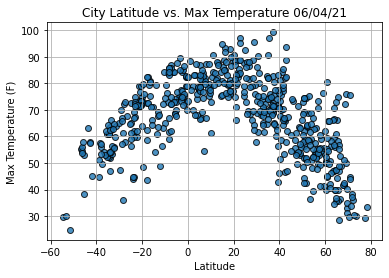

In [54]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## 6.3.2 Plot Latitude vs. Humidity


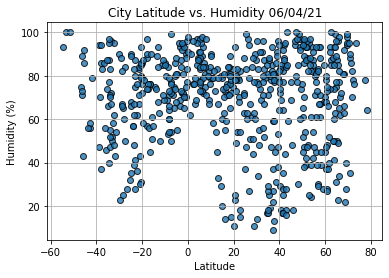

In [55]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

## 6.3.3 Plot Latitude vs. Cloudiness


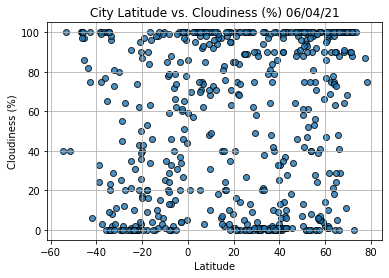

In [56]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## 6.3.4 Plot Latitude vs. Wind Speed


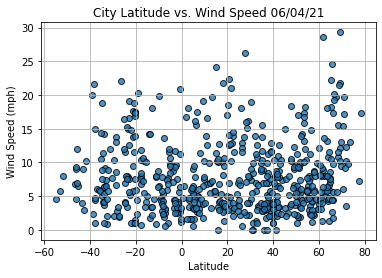

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Determine Correlations

## 6.4.1 Use Linear Regression to Find the Relationship Between Variables

<b>Linear regression</b> is used to find a relationship between a dependent variable and one or more independent variables. 
- The trick is to find something (a <b>dependent variable</b>) that depends on something else (the <b>independent variable</b>) and plot that relationship.

<b>Independent variable:</b> the variable <i>changed</i> by the analyst to observe how it affects the dependent variable 

<b>Dependent variable:</b> the variable <i>tested</i> by the analyst to observe how it is affected by the independent variable

For example, we want to understand how weather affects ice cream sales. 
- We would model the linear regression between temperature (the independent variable) and ice cream sales (the dependent variable). 
    - Our hypothesis about the relationship would be that as temperatures rise, as they do in summer, more ice cream is sold. 

For your project, you've already been working with independent and dependent variables. We have enough data to test relationships by creating scatter plots as we've done for each weather parameter vs. latitude. 
- Plotting the data is the first step in determining if there might be an association between the two variables. 
    - For our scatter plots, the independent variable is the latitude, plotted on the x-axis, as its value is fixed. When we change the latitude, temperature changes, making it the dependent variable.

To determine if maximum temperature correlates to latitude, we can plot a linear regression line. 
- This line can be plotted using the equation y = mx + b, where "m" is the slope of the line and "b" is the y-intercept. 
    - For every x-value, or latitude we use in the equation, we will get a predicted temperature value.

<b>Linear regression line</b>: A straight trendline predicting the average y-value, or dependent variable, for a given x-value, or independent variable. 

To determine how strong the relationship is between the fitted line and the data, we find the <b>correlation coefficient/r-value</b>. 
- A correlation coefficient close to 1 shows a strong positive correlation.
- A correlation coefficient close to –1 shows a strong negative correlation. 
- A correlation coefficient close to zero is no correlation.

### Practice Using Linear Regression
1. Import the linear regression function from the SciPy statistics module.

        # Import linear regression from the SciPy stats module.
        from scipy.stats import linregress

2. Generate random latitudes and an equal number of random temperatures (as we did earlier). 
- Latitudes will be in the Northern Hemisphere and therefore positive.

        # Create an equal number of latitudes and temperatures.
        lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
        temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

3. Use the <code>linregress</code> function to calculate the slope, y-intercept, correlation coefficient (r-value), <i>p-value</i>, and standard deviation, and then we'll print out the equation for the line.

        # Perform linear regression.
        (slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        print(line_eq)
        print(f"The p-value is: {p_value:.3f}")
    
    In the code to perform linear regression, the linregress function takes only two arguments, the x- and y-axes data (lats and temps) in the form of arrays. And it returns the following:
    - Slope of the regression line as <code>slope</code>
    - y-intercept as <code>intercept</code>
    - Correlation coefficient as <code>r_value</code>
    - p-value as <code>p_value</code>
    - Standard error as <code>std_err</code>

<b>IMPORTANT!</b>
The <code>slope</code>, <code>intercept</code>, <code>r_value</code>, <code>p_value</code>, and <code>std_err</code> always returned when we run the <code>linregress</code> function. 
- If you don't want to calculate one of these values but do not add it inside the parentheses, you'll get a <code>ValueError: too many values to unpack</code>.

To prevent this error, add a comma and underscore for each value you don't want to calculate.

For instance, if you don't want to print out the p-value and the standard error, write your function as (slope, intercept, r_value, _, _) = <code>linregress(x, y)</code>.
- When we run the cell, we get the equation of a line for the data and the calculated probability (p-value).
- When we run the cell, we get the equation of a line and p value for the data.

<b>p-value:</b> Used to determine significance of results. 
- In most cases, data scientists like to use a significance level of <b>0.05</b>, which means:

    - A linear regression with a p-value > 0.05 is not statistically significant.

    - A linear regression with a p-value < 0.05 is statistically significant.

    - P-values can also be used to justify rejecting a null hypothesis.

4. Calculate the ideal temperatures (y-values) using the slope and intercept from the equation of the regression line. To do this, perform list comprehension on the latitudes by multiplying each latitude by the slope and adding the intercept.

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = [(lat * slope + intercept) for lat in lats]

        # Import Matplotlib.
        import matplotlib.pyplot as plt
        # Create a scatter plot of the x and y values.
        plt.scatter(lats,temps)
        # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
        plt.plot(lats,regress_values,"r")
        # Annotate the text for the line equation and add its coordinates.
        plt.annotate(line_eq, (10,40), fontsize=15, color="red")
        plt.xlabel('Latitude')
        plt.ylabel('Temp')
        plt.show()
    
    Let's review what this code does:
    - We plot the latitudes and temperatures on a scatter plot.
    - We create a line plot of our regression line with the ideal temperatures.
    - We annotate the line plot by adding the equation of our regression line, where the x-axis is 10 and the y-axis is 40, and specify the font and color.
    - We create x- and y-axes labels.

The plot of latitude vs temperature has a regression line and equation and text for p value.

![reg](https://courses.bootcampspot.com/courses/691/files/578171/preview)

## 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

Using the data from the Northern and Southern Hemispheres, we are going to perform linear regression on all four weather parameters: 
- maximum temperature
- humidity
- cloudiness
- wind speed

We have an algorithm that performs the linear regression; returns the equation of the regression line, and correlation coefficient, and p value; and adds the regression line to a scatter plot of city weather data (code below used earlier).

    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (10,40), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel('Temp')
    plt.show()
    
We will reuse this code with minor changes for each weather parameter in each hemisphere. 

The variables for each graph are as follows:
1. The x values, the latitudes
2. The y values, each of the four weather parameters
3. The y label, the weather parameter being plotted
4. The x- and y-values given as a tuple, (10,40), for the regression line equation to be placed on the scatter plot.

With only four small changes to the code, this is a great time to convert our linear regression calculation and plotting to a function! 
- In the function, we can add these four parameters as variables, and when we call the function, pass values to those variables.

### Create a Linear Regression Function
Create a function, "plot_linear_regression", and add the four parameters inside the parentheses.

    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
In our function, we have four parameters: x_values, y_values, y_label, and text_coordinates, and we will add a fifth parameter for the title, called, title. 
- Add the algorithm we use to perform the linear regression underneath the function.

In [108]:
# Import linregress
from scipy.stats import linregress

In [109]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

If we run this code there will be no output until we call the function with five parameters.

<b>NOTE:</b> To get an output from a function, we need to call the function with the correct number of parameters or arguments for the function.

### Create the Hemisphere DataFrames
Add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. 
-To do this, we will need to create Northern Hemisphere DataFrames from the <code>city_data_df</code> DataFrame.

To create a new DataFrame from a current DataFrame, we can use the <code>loc</code> method on the current DataFrame. 
- The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. 
- The syntax to get a specific row from a current DataFrame is:
      
      row = df.loc[row_index]

Apply this method to our <code>city_data_df</code> DataFrame by adding the code <code>index13 = city_data_df.loc[13]</code> in a cell and running the cell. 
- The output will present all the information at index 13 of the <code>city_data_df</code> DataFrame. 

In [87]:
index13 = city_data_df.loc[13]
index13

City                        Avera
Country                        US
Date          2021-06-05 03:03:42
Lat                        33.194
Lng                      -82.5271
Max Temp                    78.31
Humidity                       87
Cloudiness                    100
Wind Speed                   3.51
Name: 13, dtype: object

We can also filter a DataFrame based on a value of a row. 

For instance, if we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the <code>city_data_df</code> DataFrame using the code <code>city_data_df["Lat"] >= 0</code>. 
- Executing this code will return either "True" or "False" for all the rows that meet these criteria.

In [100]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
572    False
573    False
574     True
575    False
576     True
Name: Lat, Length: 577, dtype: bool

If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the <code>loc</code> method on the <code>city_data_df</code> DataFrame. 
- Inside the brackets, we would add the conditional filter <code>city_data_df["Lat"] >= 0<code>.

In [89]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Yellowknife,CA,2021-06-05 02:59:16,62.4560,-114.3525,56.32,87,75,8.05
5,Hilo,US,2021-06-05 03:00:09,19.7297,-155.0900,77.25,83,85,5.01
6,Marzuq,YE,2021-06-05 03:03:41,14.4000,46.4667,75.13,29,6,5.28
7,Bandarbeyla,SO,2021-06-05 03:03:41,9.4942,50.8122,78.78,79,68,19.15
8,Grindavik,IS,2021-06-05 03:03:41,63.8424,-22.4338,46.87,93,75,10.74
...,...,...,...,...,...,...,...,...,...
567,Bereda,ES,2021-06-05 03:06:02,43.2686,-7.5406,46.99,100,28,2.35
568,Ruidoso,US,2021-06-05 03:06:02,33.3317,-105.6730,69.30,52,1,6.71
570,Baykit,RU,2021-06-05 03:06:03,61.6700,96.3700,49.80,40,29,6.31
574,Marystown,CA,2021-06-05 03:06:04,47.1666,-55.1483,52.86,100,100,7.92


Since this is a DataFrame, we can add the head() method at the end to get the first five rows, not counting the row of column headings.

In [101]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Yellowknife,CA,2021-06-05 02:59:16,62.4560,-114.3525,56.32,87,75,8.05
5,Hilo,US,2021-06-05 03:00:09,19.7297,-155.0900,77.25,83,85,5.01
6,Marzuq,YE,2021-06-05 03:03:41,14.4000,46.4667,75.13,29,6,5.28
7,Bandarbeyla,SO,2021-06-05 03:03:41,9.4942,50.8122,78.78,79,68,19.15
8,Grindavik,IS,2021-06-05 03:03:41,63.8424,-22.4338,46.87,93,75,10.74


Assign this DataFrame to the variable <code>northern_hemi_df</code> to access the data to perform linear regression.

We can take the same approach to get the cities for the Southern Hemisphere by filtering the <code>city_data_df</code> DataFrame for latitudes less than 0.

In [102]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

#### northern_hemi_df

In [106]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Yellowknife,CA,2021-06-05 02:59:16,62.4560,-114.3525,56.32,87,75,8.05
5,Hilo,US,2021-06-05 03:00:09,19.7297,-155.0900,77.25,83,85,5.01
6,Marzuq,YE,2021-06-05 03:03:41,14.4000,46.4667,75.13,29,6,5.28
7,Bandarbeyla,SO,2021-06-05 03:03:41,9.4942,50.8122,78.78,79,68,19.15
8,Grindavik,IS,2021-06-05 03:03:41,63.8424,-22.4338,46.87,93,75,10.74
...,...,...,...,...,...,...,...,...,...
567,Bereda,ES,2021-06-05 03:06:02,43.2686,-7.5406,46.99,100,28,2.35
568,Ruidoso,US,2021-06-05 03:06:02,33.3317,-105.6730,69.30,52,1,6.71
570,Baykit,RU,2021-06-05 03:06:03,61.6700,96.3700,49.80,40,29,6.31
574,Marystown,CA,2021-06-05 03:06:04,47.1666,-55.1483,52.86,100,100,7.92


#### southern_hemi_df

In [107]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-06-05 03:03:40,-46.6000,168.3333,55.18,75,100,6.78
2,Ushuaia,AR,2021-06-05 03:03:40,-54.8000,-68.3000,29.86,93,40,4.61
3,Hobart,AU,2021-06-05 03:00:21,-42.8794,147.3294,58.01,56,75,8.99
4,Busselton,AU,2021-06-05 03:03:40,-33.6500,115.3333,66.04,72,96,6.46
11,Carnarvon,AU,2021-06-05 03:03:42,-24.8667,113.6333,72.59,35,1,11.48


### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere
To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. 
- Set the x values equal to the latitude column 
- Set the y values equal to the maximum temperature column from the <code>northern_hemi_df</code> DataFrame.

Call the <code>plot_linear_regression</code> function with the x and y values, and edit the <code>title</code>, <code>y_label</code>, and <code>text_coordinates</code> for the maximum temperature scatter plot.

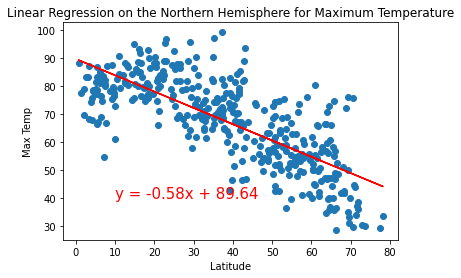

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title(f"Linear Regression on the Northern Hemisphere for Maximum Temperature"), 'Max Temp',(10,40))


<b>NOTE:</b>
If the equation for the regression line doesn't show up on your graph, you can change the <code>text_coordinates</code> until you see the equation.

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere
To generate the linear regression on the maximum temperature for the Southern Hemisphere, reuse the code for the Northern Hemisphere and replace the <code>northern_hemi_df</code> DataFrame with the <code>southern_hemi_df</code> DataFrame to get the x- and y-values.

Call the <code>plot_linear_regression</code> function with the x- and y-values, and edit the <code>title</code>, <code>y_label</code>, and <code>text_coordinates</code> for the maximum temperature scatter plot. 

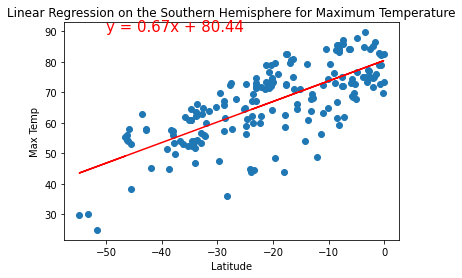

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, plt.title(f"Linear Regression on the Southern Hemisphere for Maximum Temperature"),
                    'Max Temp',(-50,90))


#### FINDING

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

## 6.4.3 Find the Correlation Between Latitude and Percent Humidity

Using the <code>plot_linear_regression</code> function, we can generate the regression lines on the percent humidity for the Northern and Southern Hemispheres.

### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere
To perform the linear regression on the percent humidity for the Northern Hemisphere, set the x-value equal to the latitude column and y-value equal to the Humidity column from the <code>northern_hemi_df</code> DataFrame.

Call the <code>plot_linear_regression</code> function with the x- and y-values, and edit the <code>title</code>, <code>y_label</code>, and <code>text_coordinates</code> for the percent humidity scatter plot.

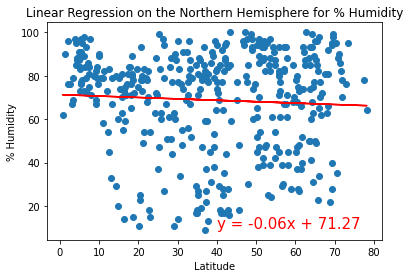

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title(f"Linear Regression on the Northern Hemisphere for % Humidity"), '% Humidity',(40,10))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere
For our linear regression line and plot of the percent humidity and latitudes for the Southern Hemisphere, set the x-value equal to the latitude column and y-value equal to the humidity column from the <code>southern_hemi_df</code> DataFrame.

Call the <code>plot_linear_regression</code> function, with the x-and y-values, and edit the <code>title</code>, <code>y_label</code>, and <code>text_coordinates</code> for the percent humidity scatter plot.

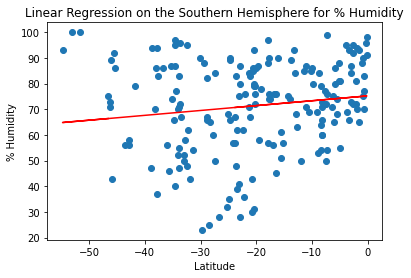

In [105]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, plt.title(f"Linear Regression on the Southern Hemisphere for % Humidity"), '% Humidity',(-50,15))

#### FINDING 
The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

## 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
#### SKILL DRILL
1. Refactor the code we have been using for linear regression lines and plots to create the x- and y-values for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
2. Call the <code>plot_linear_regression</code> function with the correct arguments to create the linear regression line and plot for percent cloudiness in the Northern Hemisphere. It should look like the following plot.  

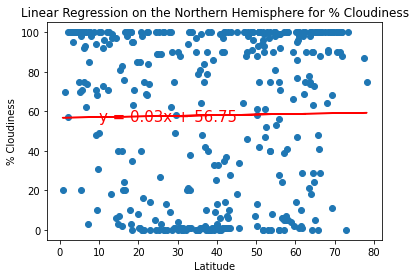

In [117]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, plt.title(f"Linear Regression on the Northern Hemisphere for % Cloudiness"), '% Cloudiness',(10,55))


### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere
Generate the x-value equal to the latitude column and the y-value equal to the cloudiness column from the southern_hemi_df DataFrame. 

Call the <code>plot_linear_regression</code> function, with the x-and y-values, and edit the <code>title</code>, <code>y_label</code>, and <code>text_coordinates</code> for the percent cloudiness scatter plot.


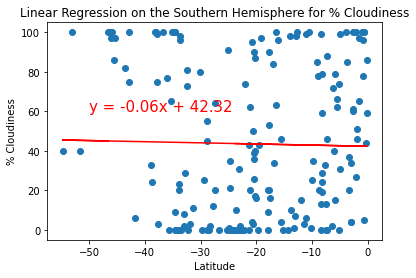

In [124]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title(f"Linear Regression on the Southern Hemisphere for % Cloudiness"), '% Cloudiness',(-50,60))

#### FINDING
The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

## 6.4.5 Find the Correlation Between Latitude and Wind Speed

### Perform Linear Regression on the Wind Speed for the Northern Hemisphere
Call the <code>plot_linear_regression</code> function, with the x-value equal to the Latitude column and the y-value equal to the Wind Speed column from the <code>northern_hemi_df</code> DataFrame. 

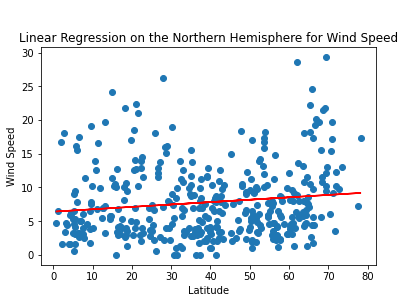

In [125]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title(f"Linear Regression on the Northern Hemisphere for Wind Speed"), 'Wind Speed',(40,35))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere
Call the plot_linear_regression function, with the x-value equal to the latitude column and the y-value equal to wind speed column from the southern_hemi_df DataFrame.

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

# Use Google API to Create Heatmaps